In [14]:
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir(r'C:\Users\chosun\Desktop\AN\taxi-1'))

['sample_submission.csv', 'test.csv', 'train.csv']


In [15]:
train_df =  pd.read_csv(r'C:\Users\chosun\Desktop\AN\taxi-1/train.csv', nrows = 60_000_000)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

In [17]:
print(train_df.isnull().sum())

key                     0
fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude     376
dropoff_latitude      376
passenger_count         0
abs_diff_longitude    376
abs_diff_latitude     376
dtype: int64


In [18]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 55423856
New size: 55423480


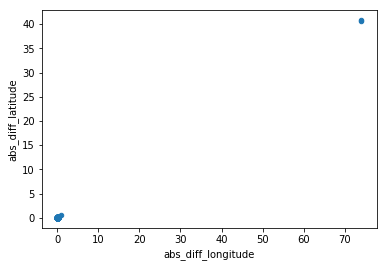

In [19]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [20]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 55423480
New size: 55308916


In [21]:
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(55308916, 3)
(55308916,)


In [22]:
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[147.19164103  76.41483685   6.41059403]


In [23]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[147.19164103  76.41483685   6.41059403]


In [24]:
test_df = pd.read_csv(r'C:\Users\chosun\Desktop\AN\taxi-1/test.csv')
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [25]:
add_travel_vector_features(test_df)
test_X = get_input_matrix(test_df)
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['.anaconda', '.android', '.AndroidStudio3.1', '.AndroidStudio3.2', '.conda', '.condarc', '.emulator_console_auth_token', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '3D Objects', '55.ipynb', 'Anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{8ebe95f7-3dcb-11e8-a9d9-7cfe90913f50}.TM.blf', 'NTUSER.DAT{8ebe95f7-3dcb-11e8-a9d9-7cfe90913f50}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{8ebe95f7-3dcb-11e8-a9d9-7cfe90913f50}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Oracle', 'Pictures', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'source', 'submission.csv', 'taxi(O).ipynb', 'taxi개선.ipynb', 'Templates', 'test1.ipynb', 'test2.ipynb', 'test3.ipynb', 